In [3]:
from pauls_functions_advanced import *
import pandas as pd
from sklearn.model_selection import train_test_split
from interpretableai import iai
from sklearn.metrics import accuracy_score
from pauls_functions_advanced import *
from joblib import Parallel, delayed
from scipy.stats import bernoulli
from sklearn.linear_model import LinearRegression

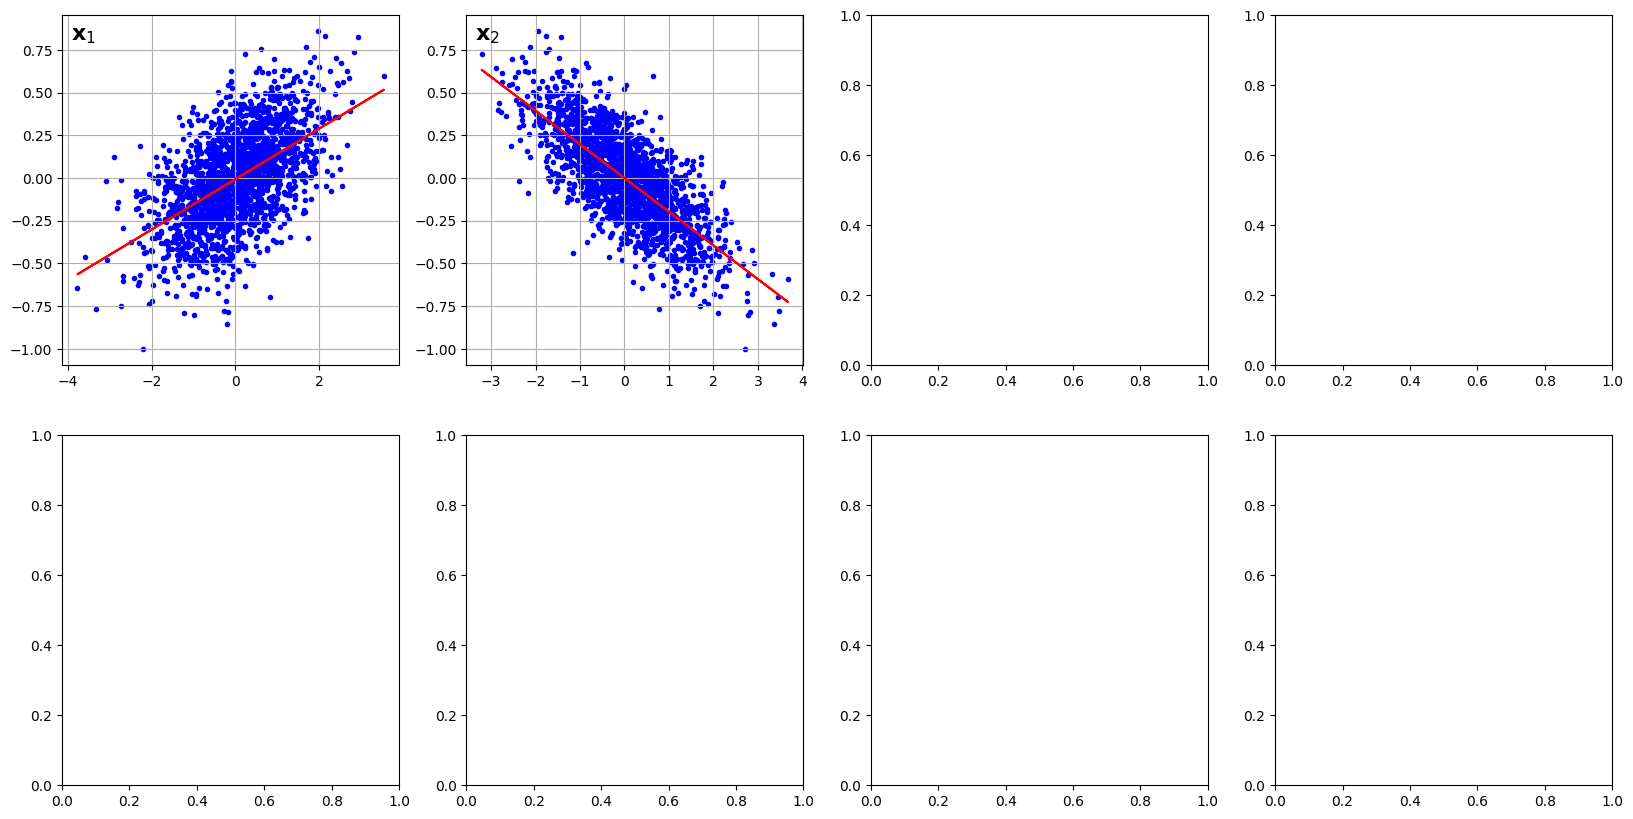

In [43]:
## Create artificial data set with
from numpy.polynomial.polynomial import polyfit
from matplotlib.offsetbox import AnchoredText
axes = [(0, 0), (0, 1), (0, 2), (0, 3),
        (1, 0), (1, 1), (1, 2), (1, 3)]

fig, ax = plt.subplots(ncols = 4, nrows = 2)
fig.set_size_inches(20, 10)
n = 2000
x1 = np.random.normal(loc = 0,scale=1, size=n)
x2 = np.random.normal(loc=0, scale=1, size=n)
x3 = np.random.normal(loc=0, scale=1, size=n)
x4 = np.random.normal(loc=0, scale=1, size=n)
x5 = np.random.normal(loc = 0,scale=1, size=n)
x6 = np.random.normal(loc=0, scale=1, size=n)
x7 = np.random.normal(loc=0, scale=1, size=n)
x8 = np.random.normal(loc=0, scale=1, size=n)
 
deterministic = 0.15*x1 - 0.2*x2
y = deterministic + np.random.normal(0, 0.1, size = n)
b, m = polyfit(x1, y, 1)

next_ax = next

anchored_text = AnchoredText(r"$\mathbf{x}_1$", loc=2,borderpad=0.,frameon=False, prop=dict(fontsize=16))
ax[0, 0].add_artist(anchored_text)
ax[0, 0].scatter(x1, y, c ="blue", marker = '.')
ax[0, 0].plot(x1, b + m * x1, '-', color = 'red')
ax[0, 0].grid()

anchored_text = AnchoredText(r"$\mathbf{x}_2$", loc=2,borderpad=0.,frameon=False, prop=dict(fontsize=16))
ax[0, 1].add_artist(anchored_text)
ax[0, 1].scatter(x2, y, c ="blue", marker = '.')
b, m = polyfit(x2, y, 1)
ax[0, 1].plot(x2, b + m * x2, '-', color = 'red')
ax[0, 1].grid()

In [4]:
names = ['Reg-CART','CART','ORT','OCT','ORT-H','OCT-H']

iters = 50

accuracies = {i: {} for i in range(iters)}

for i in range(iters):

    ## Create artificial data set with
    n = 2000
    x1 = np.random.normal(loc = 0,scale=1, size=n)
    x2 = np.random.normal(loc=0, scale=1, size=n)
    x3 = np.random.normal(loc=0, scale=1, size=n)
    x4 = np.random.normal(loc=0, scale=1, size=n)
    x5 = np.random.normal(loc = 0,scale=1, size=n)
    x6 = np.random.normal(loc=0, scale=1, size=n)
    x7 = np.random.normal(loc=0, scale=1, size=n)
    x8 = np.random.normal(loc=0, scale=1, size=n)
    
    deterministic = 0.15*x1 - 0.2*x2
    y = deterministic + np.random.normal(0, 0.1, size = n)

    simulated_data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 
                                    'x5': x5, 'x6': x6, 'x7': x7, 'x8': x8,
                                    'y': y, 'y_bar': deterministic})

    features = simulated_data[[f'x{i}' for i in range(1, 9)]]
    diagnosis = simulated_data['y']
    orig_cols = simulated_data.columns

    X_train, X_test, y_train, y_test = train_test_split(features, diagnosis, test_size = 0.2, random_state=i)

    models, performance = generate_tree(X_train, y_train, X_test, y_test, 
                                        n_num=2, feat_size=8,  max_iter_hy=2, 
                                        depth_bi=3, depth_hy=3, complexity_bi=0.001, 
                                        complexity_hy=0.001, depth_grid_bi=False, depth_grid_hy=False, 
                                        Reg_CART=True, ORT=True, ORT_H=False, 
                                        Clas_CART=False, OCT=False, OCT_H=False)
    
    act_name = []
    act_rules = []
    for model,name in zip(models,names):
        if not not model:
            act_name += [name]
            act_rules += [model]

    datasets = gen_train_and_test_features(act_rules, act_name, X_train, X_test)

    log_reg_acc = linear_regression_pipeline(X_train, X_test, y_train, y_test)

    accuracies[i]["Linear Regression"] = log_reg_acc
    accuracies[i]["Reg CART"] = performance['Reg CART'].iloc[0]
    accuracies[i]["ORT"] = performance['ORT'].iloc[0]

    for model in datasets.keys():

        X_train_rules_and_features, X_test_rules_and_features = datasets[model][0]
        X_train_only_rules, X_test_only_rules = datasets[model][1]

        only_rules_acc = linear_regression_pipeline(X_train_only_rules, X_test_only_rules, y_train, y_test)

        rules_and_features_acc = linear_regression_pipeline(X_train_rules_and_features, X_test_rules_and_features, y_train, y_test)

        accuracies[i][model + "_rules_and_features"] = rules_and_features_acc
    
    accuracies[i]["True Model"] = r2_score(y_test, simulated_data.loc[y_test.index, "y_bar"])



    ----------------------------------------- section 1 -----------------------------------------


[ Warning: This copy of Interpretable AI software is for academic purposes only and not for commercial use.


Regression CART mean performance:  0.6992581954519439


Regression ORT performance:  0.6876421812480815




    ----------------------------------------- section 2 -----------------------------------------
Regression CART mean performance:  0.6992581954519439


Regression ORT performance:  0.6876421812480815




    ----------------------------------------- section 1 -----------------------------------------
Regression CART mean performance:  0.6513391774566872


Regression ORT performance:  0.6543673983461173




    ----------------------------------------- section 2 -----------------------------------------
Regression CART mean performance:  0.6513391774566872


Regression ORT performance:  0.6543673983461173




    ----------------------------------------- section 1 -----------------------------------------
Regression CART mean performance:  0.667555664230924


Regression ORT performance:  0.6631813181656581




    ----------------------------------------- section 2 -------------

In [18]:
accuracies = pd.DataFrame(accuracies).T.rename(columns = {"Reg CART": "CART", "Reg-CART_rules_and_features": "RuleFit", "OCT_rules": "OCT", "ORT_rules_and_features": "ORRFA", "Logistic Regession": "Log. Regression"})

In [19]:
accuracies = accuracies.rename(columns = {"Logistic Regression": "Log. Regression"})

In [23]:
accuracies.to_csv("linear.csv")

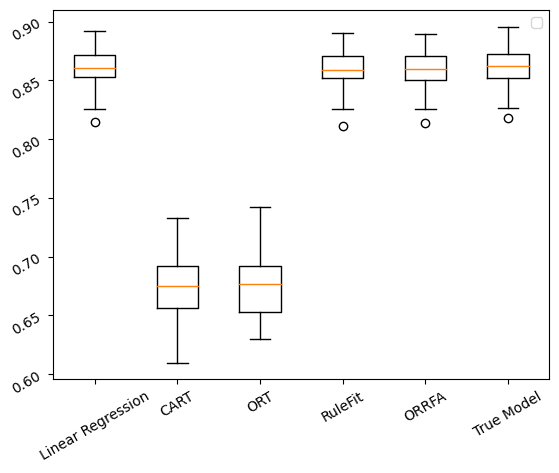

In [24]:
fig, ax = plt.subplots()


ax.boxplot(accuracies)
ax.set_xticklabels(accuracies.columns)

ax.legend()
ax.tick_params(rotation = 30)